In [1]:
#Bismillah
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('Heart Disease.csv')

In [348]:
df1=df.copy() # copying same value for further use
df2=df.copy()
df3=df.copy()
df4=df.copy()


In [349]:
df.dtypes

HeartDisease          int64
BMI                 float64
PhysicalHealth        int64
MentalHealth          int64
AgeCategory         float64
Diabetic            float64
GenHealth           float64
SleepTime             int64
Smoking               uint8
Alcohol_Drinking      uint8
Stroke                uint8
Diffwalking           uint8
Sex                   uint8
Race_Asian            uint8
Race_Black            uint8
Race_Hispanic         uint8
Race_Other            uint8
Race_White            uint8
PhysicalActivity      uint8
Asthma                uint8
KidneyDisease         uint8
SkinCancer            uint8
dtype: object

# Encoding datas according to its contidions

In [350]:
# Label encoding for target class y= heath disease according to skitlearn

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df.HeartDisease = le.fit_transform(df[['HeartDisease']])

In [7]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
ordinal = OrdinalEncoder(categories=[['Poor','Fair','Good','Very good','Excellent']]) 

In [10]:
encoded = ordinal.fit_transform(df[['GenHealth']])

In [11]:
encoded

array([[3.],
       [3.],
       [1.],
       ...,
       [2.],
       [2.],
       [2.]])

In [12]:
df.GenHealth = encoded

In [216]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0


In [14]:
ordinal2 = OrdinalEncoder(categories=[['Yes','Yes (during pregnancy)','No, borderline diabetes','No']]) 

In [15]:
encoded1 = ordinal2.fit_transform(df[['Diabetic']])

In [16]:
df.Diabetic = encoded1

In [17]:
encoded1

array([[0.],
       [3.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3,30,No,Female,55-59,White,0.0,Yes,3.0,5,Yes,No,Yes
1,0,20.34,No,No,Yes,0,0,No,Female,80 or older,White,3.0,Yes,3.0,7,No,No,No
2,0,26.58,Yes,No,No,20,30,No,Male,65-69,White,0.0,Yes,1.0,8,Yes,No,No
3,0,24.21,No,No,No,0,0,No,Female,75-79,White,3.0,No,2.0,6,No,No,Yes
4,0,23.71,No,No,No,28,0,Yes,Female,40-44,White,3.0,Yes,3.0,8,No,No,No


In [19]:
ordinal3 = OrdinalEncoder(categories=[['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']]) 

In [20]:
encoded2 = ordinal3.fit_transform(df[['AgeCategory']])

In [21]:
df.AgeCategory = encoded2

In [22]:
encoded2

array([[ 7.],
       [12.],
       [ 9.],
       ...,
       [ 5.],
       [ 1.],
       [12.]])

In [23]:
#loop one hot encoding
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    one = pd.get_dummies(df[col], drop_first=True,prefix=col)
    df.drop(df[[col]], axis=1, inplace=True)
    df = pd.concat([df, one], axis=1)

In [24]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,...,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0


In [25]:
df11=df.copy()
df12=df.copy()

In [26]:
df.rename(
    columns={"Smoking_Yes": "Smoking", "AlcoholDrinking_Yes": "Alcohol_Drinking", "Sex_Male": "Sex","PhysicalActivity_Yes": "PhysicalActivity","KidneyDisease_Yes": "KidneyDisease","SkinCancer_Yes": "SkinCancer"},
    inplace=True,
)

In [27]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma_Yes,KidneyDisease,SkinCancer
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0


In [28]:
df.rename(
    columns={"Asthma_Yes": "Asthma","DiffWalking_Yes": "Diffwalking","Stroke_Yes": "Stroke" },
    inplace=True,
)

In [29]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0


In [30]:
df15=df.copy()
df16=df.copy()

In [31]:
df.isnull().values.any()

False

# Preprocess the dataset

In [32]:
# seperate x, y

In [33]:
x = df.drop('HeartDisease',axis=1) #separate dependent and independent variable
y = df['HeartDisease'] #  HeartDisease is class

In [34]:
x.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,3,30,7.0,0.0,3.0,5,1,0,0,...,0,0,0,0,0,1,1,1,0,1
1,20.34,0,0,12.0,3.0,3.0,7,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,26.58,20,30,9.0,0.0,1.0,8,1,0,0,...,1,0,0,0,0,1,1,1,0,0
3,24.21,0,0,11.0,3.0,2.0,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,23.71,28,0,4.0,3.0,3.0,8,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [35]:
x.shape

(319795, 21)

In [36]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

In [37]:
y.shape

(319795,)

In [38]:
df.HeartDisease.value_counts() # counts target class

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [39]:
df.dtypes

HeartDisease          int64
BMI                 float64
PhysicalHealth        int64
MentalHealth          int64
AgeCategory         float64
Diabetic            float64
GenHealth           float64
SleepTime             int64
Smoking               uint8
Alcohol_Drinking      uint8
Stroke                uint8
Diffwalking           uint8
Sex                   uint8
Race_Asian            uint8
Race_Black            uint8
Race_Hispanic         uint8
Race_Other            uint8
Race_White            uint8
PhysicalActivity      uint8
Asthma                uint8
KidneyDisease         uint8
SkinCancer            uint8
dtype: object

# imbalanced data

In [40]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [41]:
no_heart_ds = ( 292422/(292422+27373)) * 100
yes_heart_ds = (27373/(292422+27373)) * 100

In [42]:
print('No hearth diseace {} percent of total people'.format(no_heart_ds))
print('Yes hearth diseace {} percent of total people'.format(yes_heart_ds))

No hearth diseace 91.44045404086994 percent of total people
Yes hearth diseace 8.559545959130068 percent of total people


# Let's balance the data

# Over Sampling

In [43]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0


In [45]:
df.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
over = RandomOverSampler(random_state=100)

In [48]:
x_new , y_new = over.fit_resample(x,y)

In [49]:
y_new.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [50]:
df11=pd.concat([x_new,y_new],axis=1)

In [51]:
df11

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3,30,7.0,0.0,3.0,5,1,0,0,...,0,0,0,0,1,1,1,0,1,0
1,20.34,0,0,12.0,3.0,3.0,7,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,26.58,20,30,9.0,0.0,1.0,8,1,0,0,...,0,0,0,0,1,1,1,0,0,0
3,24.21,0,0,11.0,3.0,2.0,6,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,23.71,28,0,4.0,3.0,3.0,8,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584839,25.09,0,2,8.0,3.0,3.0,10,1,0,0,...,0,0,0,0,1,1,0,0,0,1
584840,26.65,0,0,10.0,3.0,2.0,7,1,0,0,...,0,0,0,0,1,1,0,1,0,1
584841,32.69,0,0,12.0,3.0,3.0,8,0,0,0,...,0,0,0,0,1,1,1,0,1,1
584842,53.22,7,0,8.0,3.0,1.0,6,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [351]:
df12=df11.copy()
df13=df11.copy()
df14=df11.copy()

# cross validate with hold out cross validate the sample

In [53]:
from sklearn.model_selection import train_test_split 

In [54]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.75,random_state=42) 

In [55]:
xtrain.head() 

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
370055,26.29,30,14,9.0,0.0,0.0,5,1,0,0,...,0,0,0,0,0,1,0,0,0,0
562784,31.85,2,4,11.0,0.0,1.0,9,0,0,0,...,1,0,0,0,0,1,0,0,0,0
178333,37.20,0,0,7.0,3.0,2.0,7,0,0,0,...,0,0,0,0,0,1,0,0,0,0
450618,33.20,0,2,9.0,3.0,2.0,7,1,0,0,...,0,0,0,0,1,0,0,0,0,0
114989,31.82,7,7,10.0,3.0,1.0,8,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
dtClf = DecisionTreeClassifier() 

In [58]:
dtClf.fit(xtrain,ytrain) 

DecisionTreeClassifier()

In [59]:
dtClf.score(xtest,ytest) # after sampling

0.9525959059167914

In [60]:
# Without sampling

In [61]:
df15

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,16.60,3,30,7.0,0.0,3.0,5,1,0,...,0,0,0,0,0,1,1,1,0,1
1,0,20.34,0,0,12.0,3.0,3.0,7,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,20,30,9.0,0.0,1.0,8,1,0,...,1,0,0,0,0,1,1,1,0,0
3,0,24.21,0,0,11.0,3.0,2.0,6,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,23.71,28,0,4.0,3.0,3.0,8,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,7,0,8.0,0.0,1.0,6,1,0,...,1,0,0,1,0,0,0,1,0,0
319791,0,29.84,0,0,3.0,3.0,3.0,5,1,0,...,1,0,0,1,0,0,1,1,0,0
319792,0,24.24,0,0,5.0,3.0,2.0,6,0,0,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,1.0,3.0,2.0,12,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
x = df15.drop('HeartDisease',axis=1) #separate dependent and independent variable
y = df15['HeartDisease'] #  HeartDisease is class

In [63]:
x.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Sex,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,16.60,3,30,7.0,0.0,3.0,5,1,0,0,...,0,0,0,0,0,1,1,1,0,1
1,20.34,0,0,12.0,3.0,3.0,7,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,26.58,20,30,9.0,0.0,1.0,8,1,0,0,...,1,0,0,0,0,1,1,1,0,0
3,24.21,0,0,11.0,3.0,2.0,6,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,23.71,28,0,4.0,3.0,3.0,8,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [64]:
y.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

In [65]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.75,random_state=42) 

In [66]:
dtClf.fit(xtrain1, ytrain1) 

DecisionTreeClassifier()

In [67]:
dtClf.score(xtest1,ytest1) # imbalanced old data

0.8638381968504922

# K Fold Cross Validation

In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [69]:
kfold = KFold(n_splits=4, shuffle=True) #each fold contain 25% data

In [70]:
result = cross_val_score(dtClf, x_new, y_new, cv=kfold) 

In [71]:
result

array([0.95270534, 0.95258907, 0.95323197, 0.95286948])

In [72]:
result.mean()

0.9528489648521657

In [73]:
result.max()

0.9532319729705699

In [74]:
result.min()

0.9525890664861058

In [75]:
result.mean()

0.9528489648521657

# Stratified k fold cross Validation

In [76]:
from sklearn.model_selection import StratifiedKFold

In [77]:
st = StratifiedKFold(n_splits=4)

In [78]:
score2 = cross_val_score(dtClf, x_new, y_new,cv=st)

In [79]:
score2

array([0.951953  , 0.95239756, 0.95349871, 0.95232233])

In [80]:
score2.max()

0.9534987107673157

In [81]:
score2.min()

0.9519529994323273

In [82]:
score2.mean()

0.9525429003289766

# Data analysis

In [83]:
df11.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3,30,7.0,0.0,3.0,5,1,0,0,...,0,0,0,0,1,1,1,0,1,0
1,20.34,0,0,12.0,3.0,3.0,7,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,26.58,20,30,9.0,0.0,1.0,8,1,0,0,...,0,0,0,0,1,1,1,0,0,0
3,24.21,0,0,11.0,3.0,2.0,6,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,23.71,28,0,4.0,3.0,3.0,8,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [84]:
df11.HeartDisease.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

# Columns Description

"""
1. HeartDisease: Respondents that have ever reported having
coronary heart disease (CHD) or myocardial infarction (MI)
2. BMI: Body Mass Index (BMI)
3. Smoking: Have you smoked at least 100 cigarettes in your entire
life? [Note: 5 packs = 100 cigarettes]
4. AlcoholDrinking: Heavy drinkers (adult men having more than 14
drinks per week and adult women having more than 7 drinks per
week
5. Stroke: (Ever told) (you had) a stroke?
6. PhysicalHealth: Now thinking about your physical health, which
includes physical illness and injury, for how many days during the
past 30 days was your physical
7. MentalHealth: Thinking about your mental health, for how many
days during the past 30 days was your mental health not good?
8. DiffWalking: Do you have serious difficulty walking or climbing
stairs?
9. Sex: Are you male or female?
10. AgeCategory: Fourteen-level age category
11. Race: Imputed race/ethnicity value
12. Diabetic: (Ever told) (you had) diabetes?
13. PhysicalActivity: Adults who reported doing physical activity
or exercise during the past 30 days other than their regular job
14. GenHealth: Would you say that in general your health is..
15. SleepTime: On average, how many hours of sleep do you get
in a 24-hour period?
16. Asthma: (Ever told) (you had) asthma?
17. Kidney Disease: Not including kidney stones, bladder
infection or incontinence, were you ever told you had kidney
disease?

18. SkinCancer: (Ever told) (you had) skin cancer)
"""

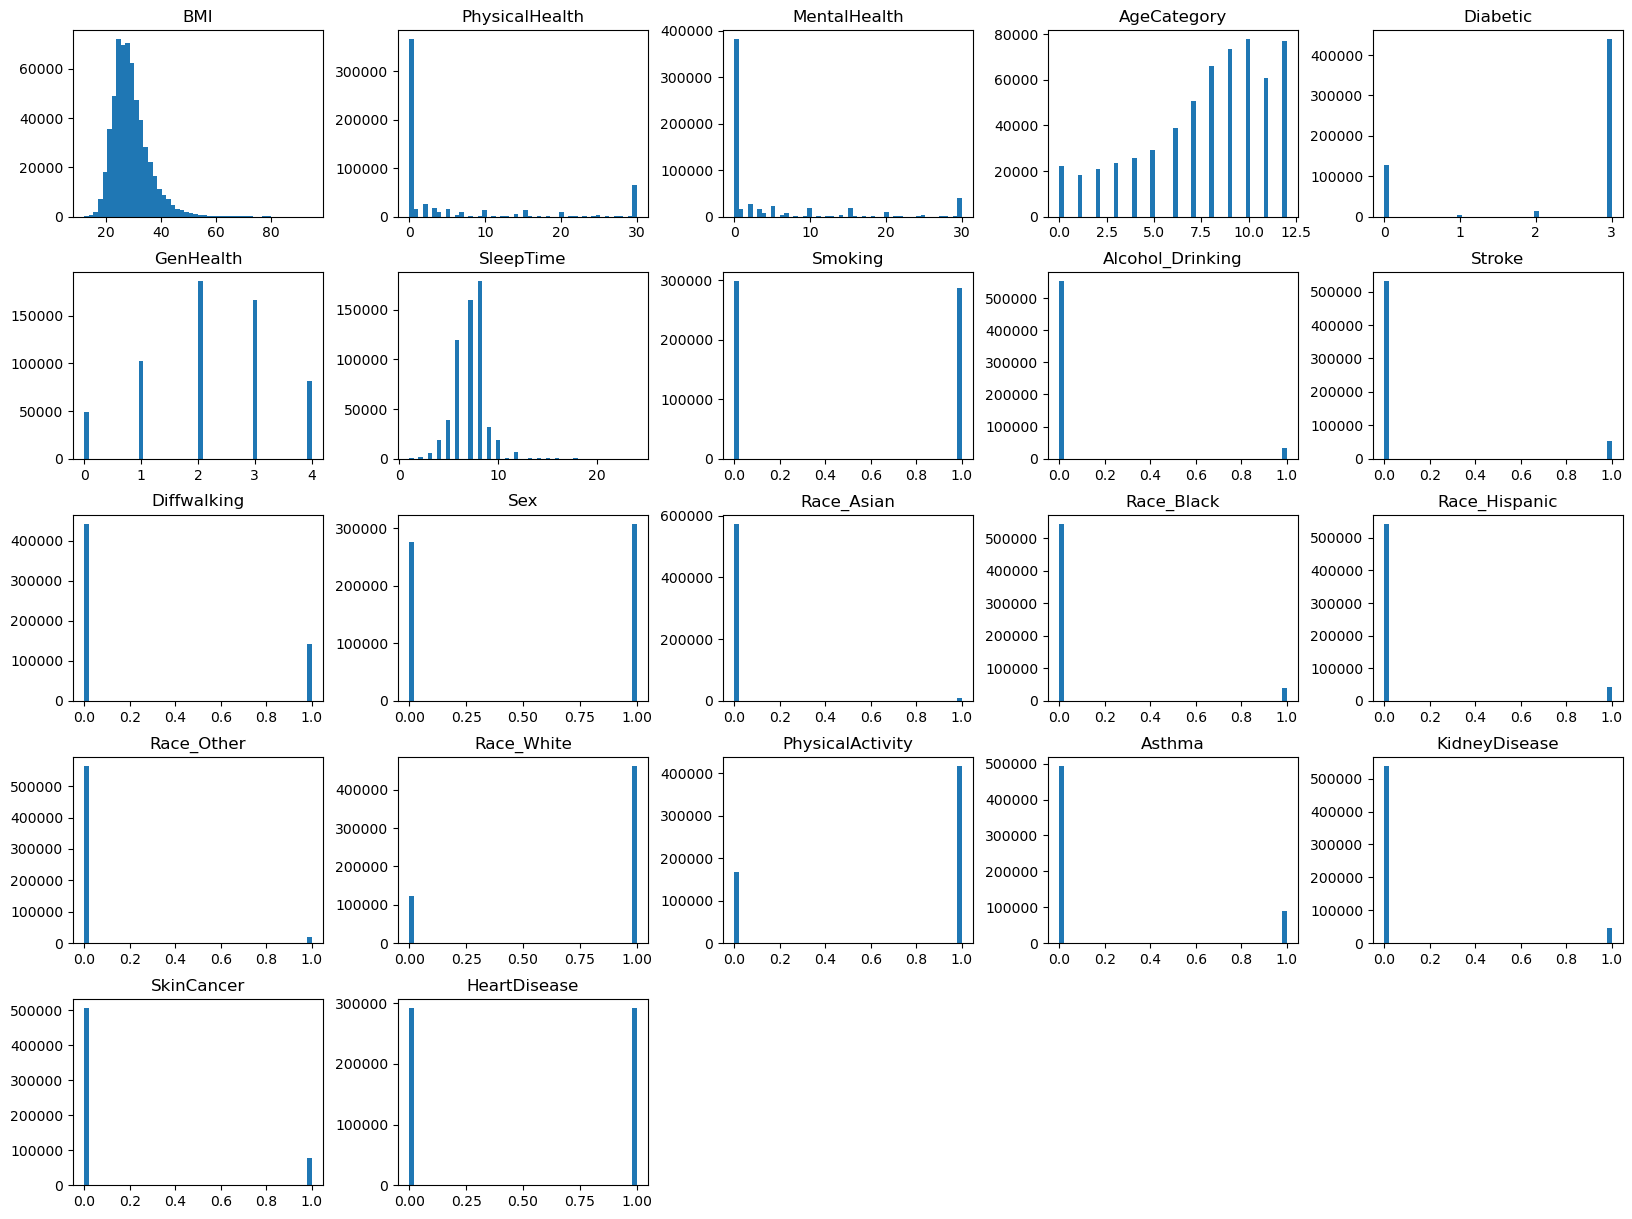

In [85]:
df11.hist(bins=50,grid=False,figsize=(20,15)); # histogram at a glance 

In [86]:
corr = df11.corr()


In [87]:
corr.shape

(22, 22)

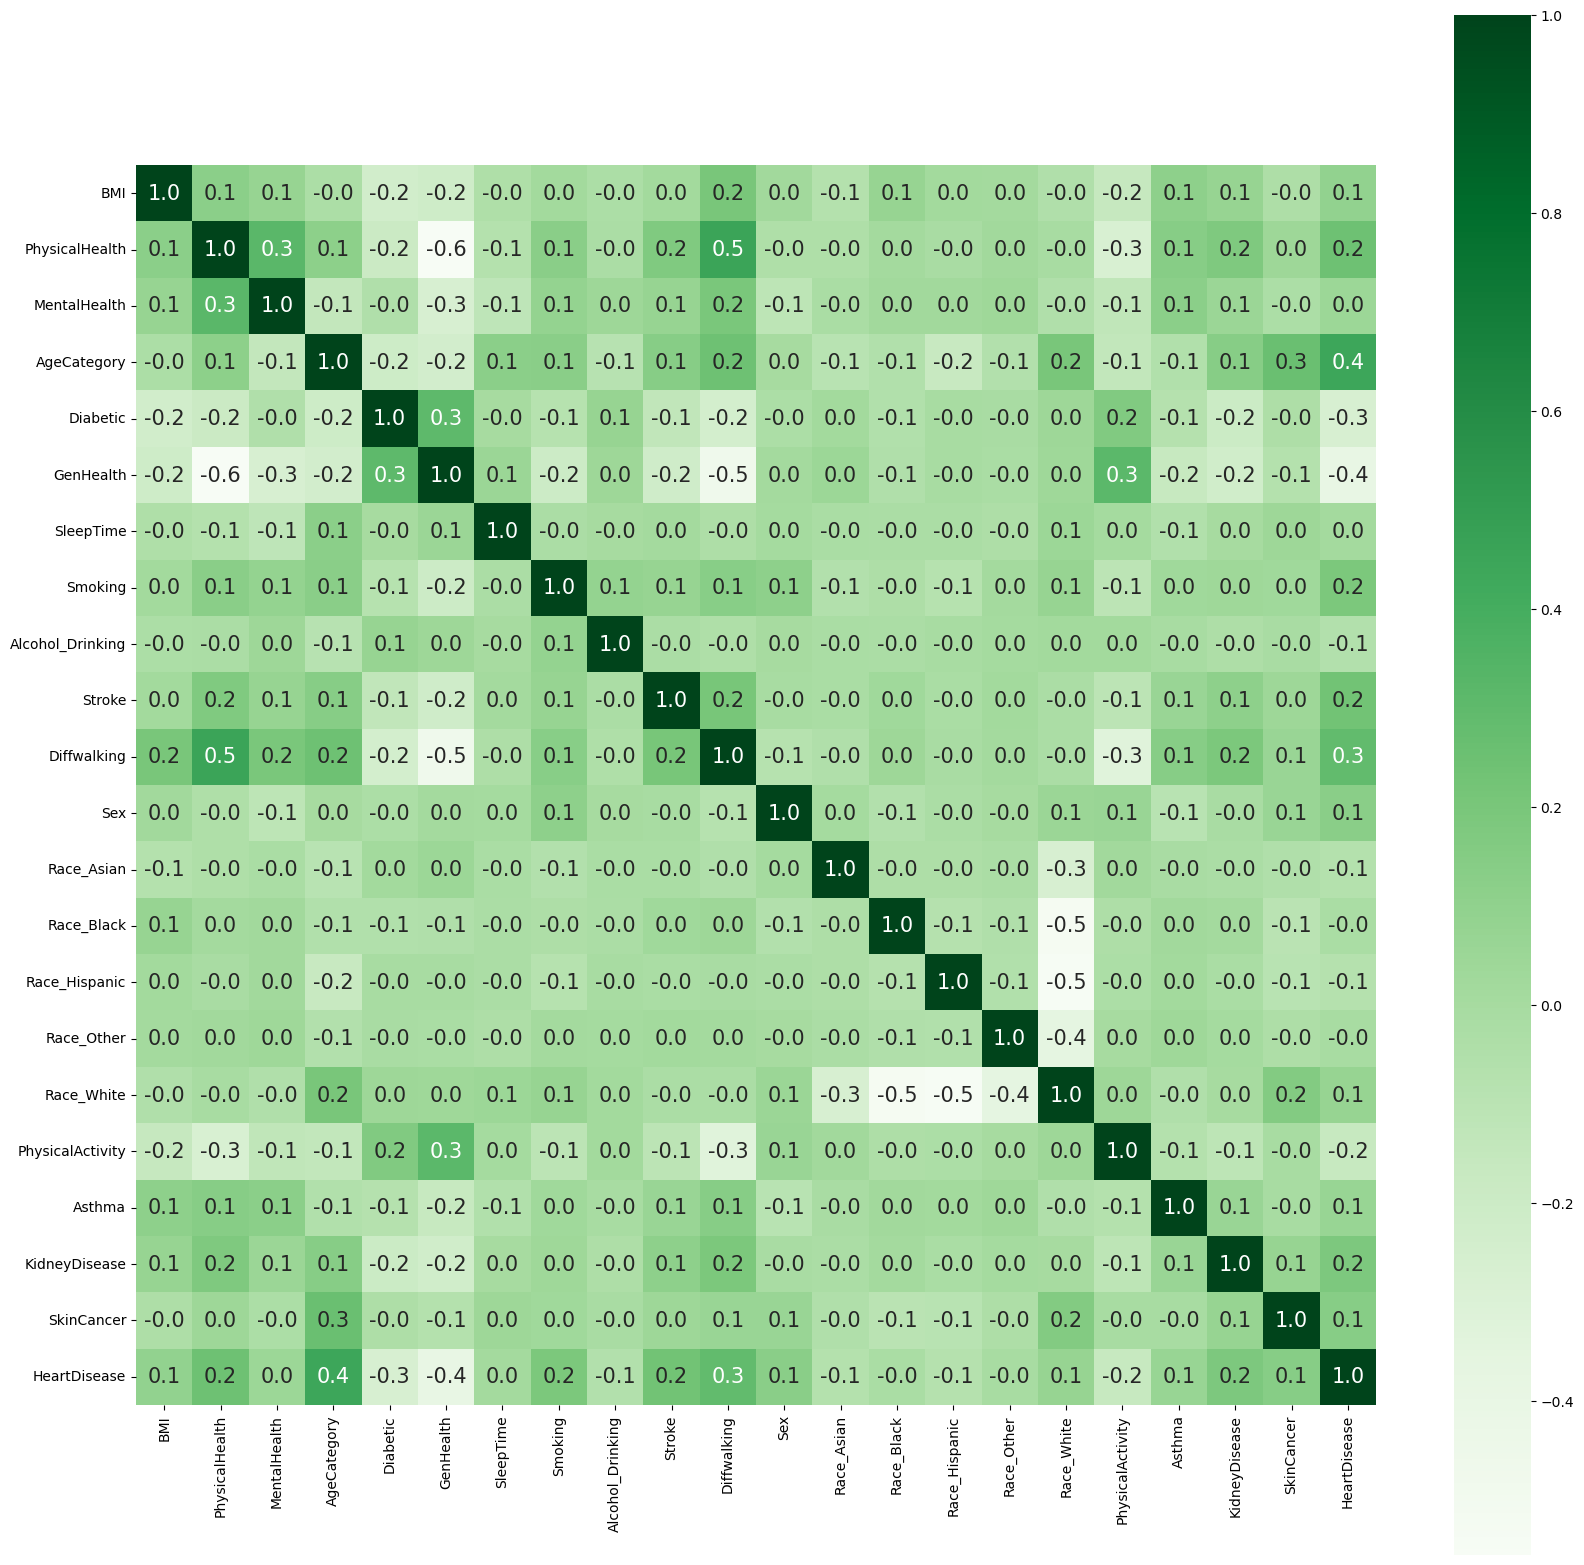

In [88]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [89]:
#The above heatmap shows us a correlation between the various features. The closer the value to 1, the higher is the correlation between the pair of features

# Based on the correlation with  Y(target variable "Hearth disease(1.0)) the variables are arranged respectively
* ****1 AgeCategory(0.4)
* ***2 Diffwalking(0.3)
*    3 Stroke(0.2)
*    4 KidneyDisease(0.2)
*    5 Smoking(0.2)
*    6 PhysicalHealth(0.2)
*    7 BMI(0.1)
*    8 Sex(0.1)
*    #9 Race_White(0.1)
*    #10 Asthma(0.1)
*    #11 SkinCancer(0.1)
*    #12 MentalHealth(0.0)
*    #13 SleepTime(0.0) 
*    #14 Race_Other(-0.0)
*    #15 Race_Black(-0.0)
*    #16 Race_Hispanic(-0.1)
*    #17 Race_Asian(-0.1)
*    #18 Alcohol_Drinking(-0.1)
*    #19 PhysicalActivity(-0.2)
*    #20 Diabetic(-0.3)
*    #21 GenHealth(-0.4)


In [90]:
df11.dtypes

BMI                 float64
PhysicalHealth        int64
MentalHealth          int64
AgeCategory         float64
Diabetic            float64
GenHealth           float64
SleepTime             int64
Smoking               uint8
Alcohol_Drinking      uint8
Stroke                uint8
Diffwalking           uint8
Sex                   uint8
Race_Asian            uint8
Race_Black            uint8
Race_Hispanic         uint8
Race_Other            uint8
Race_White            uint8
PhysicalActivity      uint8
Asthma                uint8
KidneyDisease         uint8
SkinCancer            uint8
HeartDisease          int64
dtype: object

In [91]:
df11.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
count,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,...,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.000000,584844.0
mean,28.822267,5.390706,4.237434,7.749836,2.309277,2.220703,7.116202,0.490550,0.056367,0.092731,...,0.018030,0.067859,0.070595,0.033671,0.791970,0.714180,0.154646,0.077212,0.133733,0.5
std,6.489919,9.981221,8.544858,3.374881,1.238347,1.140067,1.602305,0.499911,0.230630,0.290055,...,0.133062,0.251504,0.256147,0.180380,0.405899,0.451804,0.361568,0.266928,0.340366,0.5
min,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,24.390000,0.000000,0.000000,6.000000,3.000000,1.000000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,27.780000,0.000000,0.000000,8.000000,3.000000,2.000000,7.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.5
75%,32.080000,5.000000,3.000000,10.000000,3.000000,3.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
max,94.850000,30.000000,30.000000,12.000000,3.000000,4.000000,24.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


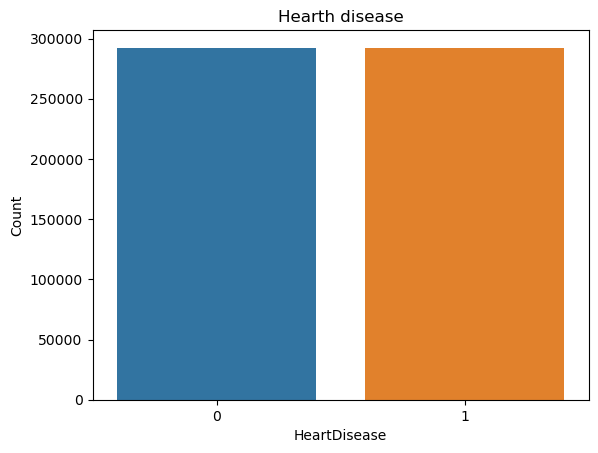

In [92]:
# Analyzing the target variable

plt.title('Hearth disease')
sns.countplot(df11['HeartDisease'])
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.show()

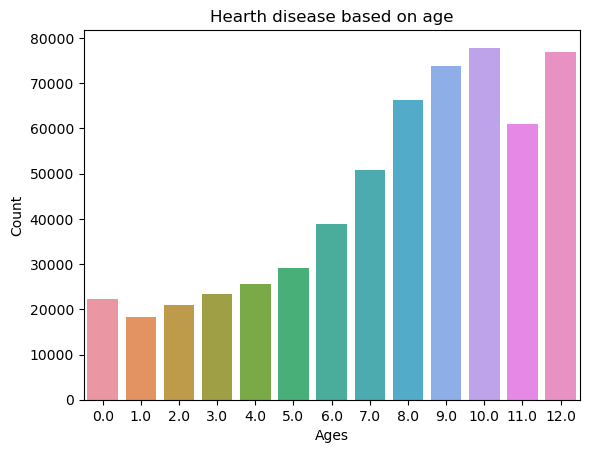

In [345]:
# Analyzing the target variable

plt.title('Hearth disease based on age')
sns.countplot(df11['AgeCategory'])
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

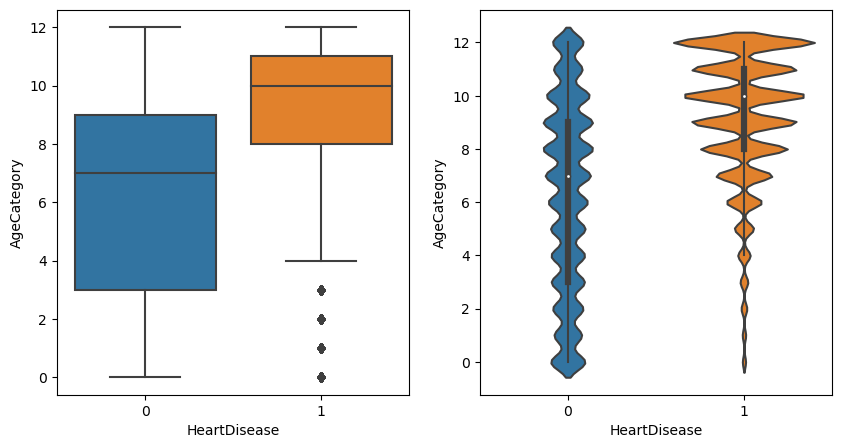

In [352]:
# Plotting correlation between Hearth disease and Agecategory

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="HeartDisease", y="AgeCategory", data=df11)
plt.subplot(1,2,2)
sns.violinplot(x="HeartDisease", y="AgeCategory", data=df11)
plt.show()
# Diffirent interval of ages acffected with hearth disease has been presented.

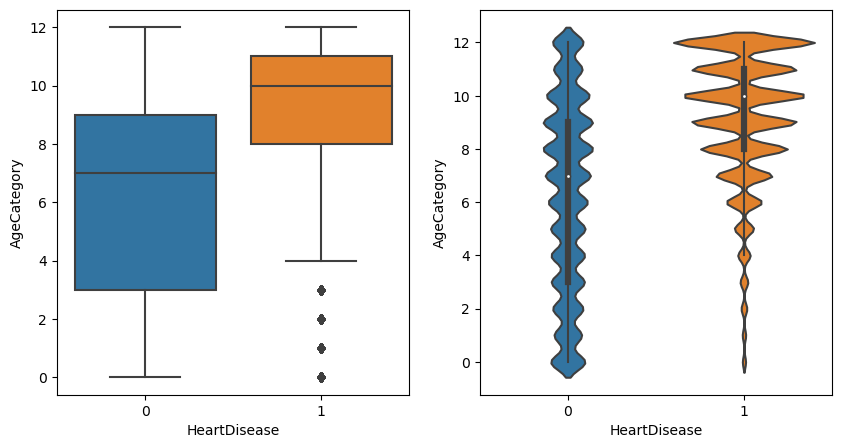

In [95]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="HeartDisease", y="AgeCategory", data=df11)
plt.subplot(1,2,2)
sns.violinplot(x="HeartDisease", y="AgeCategory", data=df11)
plt.show()

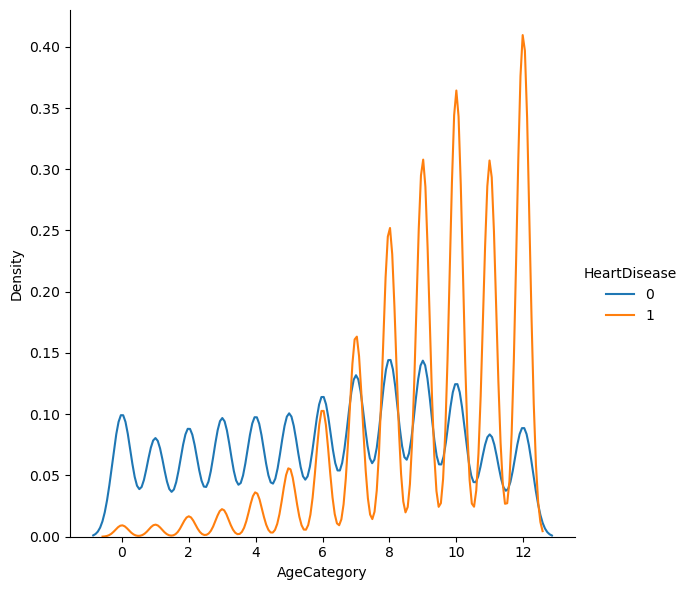

In [353]:
sns.FacetGrid(df11, hue="HeartDisease", height=6).map(sns.kdeplot, "AgeCategory").add_legend()
plt.show()

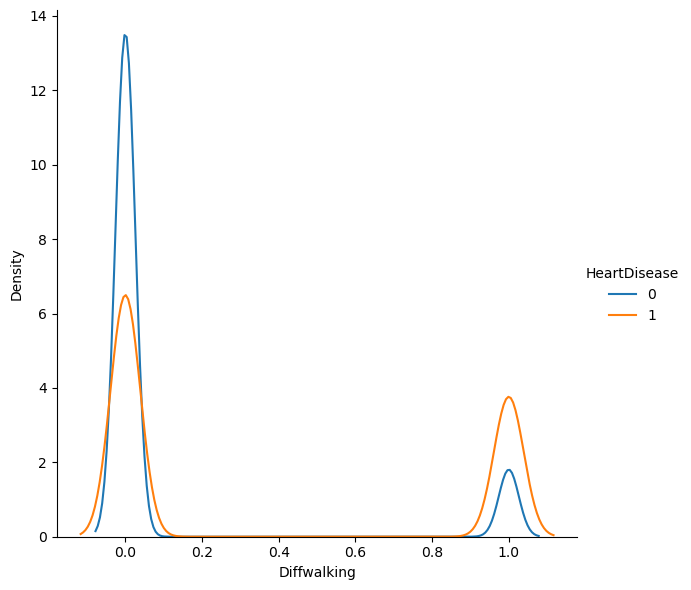

In [355]:
sns.FacetGrid(df11, hue="HeartDisease", height=6).map(sns.kdeplot, "Diffwalking").add_legend()
plt.show()

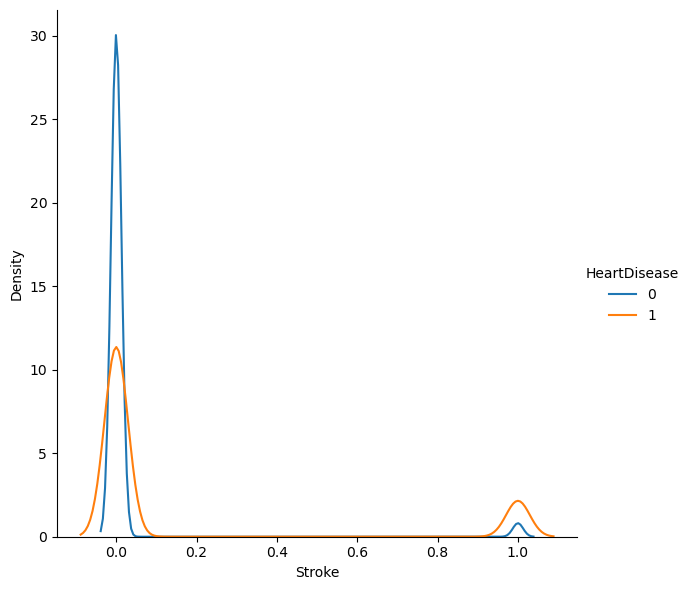

In [359]:
sns.FacetGrid(df11, hue="HeartDisease", height=6).map(sns.kdeplot, "Stroke").add_legend()
plt.show()

In [99]:
df11.dtypes

BMI                 float64
PhysicalHealth        int64
MentalHealth          int64
AgeCategory         float64
Diabetic            float64
GenHealth           float64
SleepTime             int64
Smoking               uint8
Alcohol_Drinking      uint8
Stroke                uint8
Diffwalking           uint8
Sex                   uint8
Race_Asian            uint8
Race_Black            uint8
Race_Hispanic         uint8
Race_Other            uint8
Race_White            uint8
PhysicalActivity      uint8
Asthma                uint8
KidneyDisease         uint8
SkinCancer            uint8
HeartDisease          int64
dtype: object

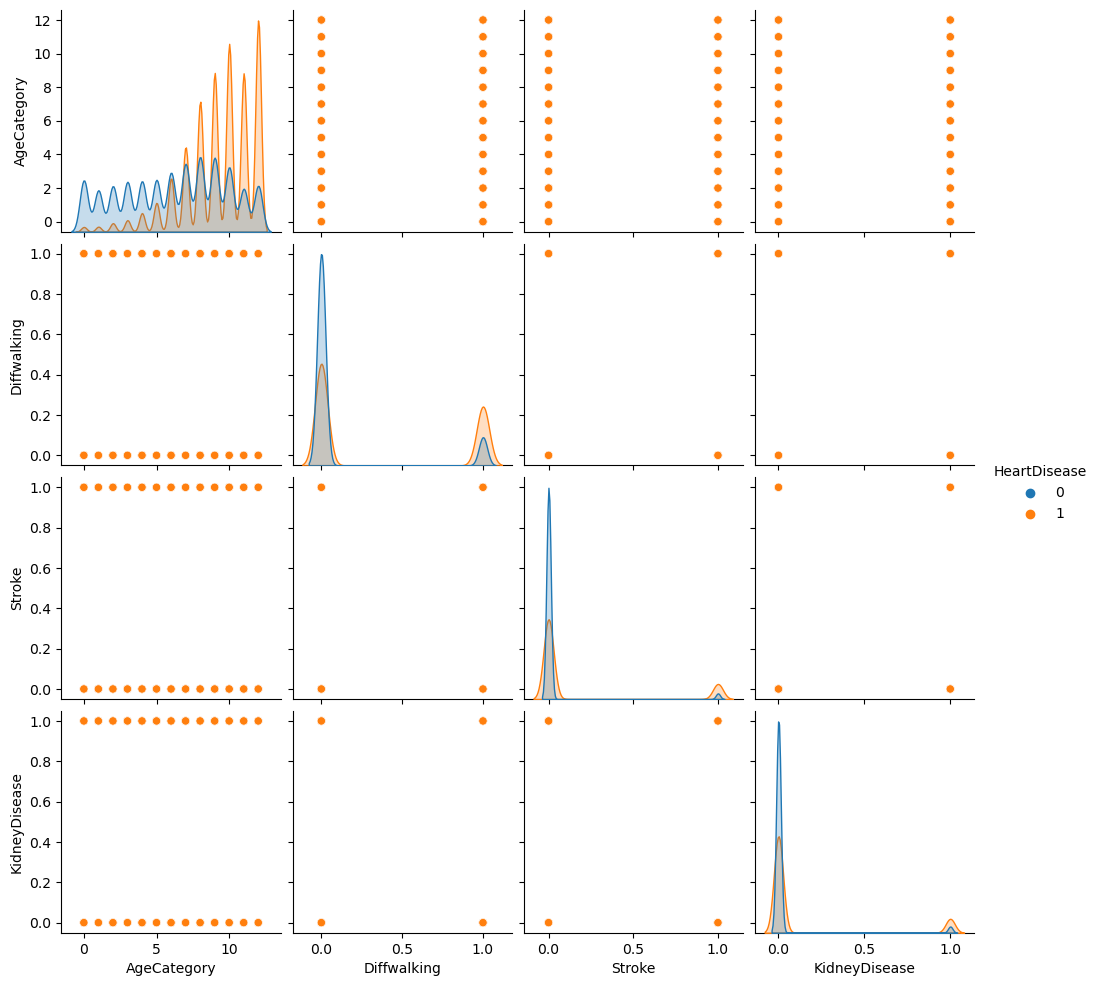

In [101]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "HeartDisease"
sns.pairplot(df11, hue="HeartDisease", vars = ["AgeCategory", "Diffwalking", "Stroke", "KidneyDisease"])
plt.show()

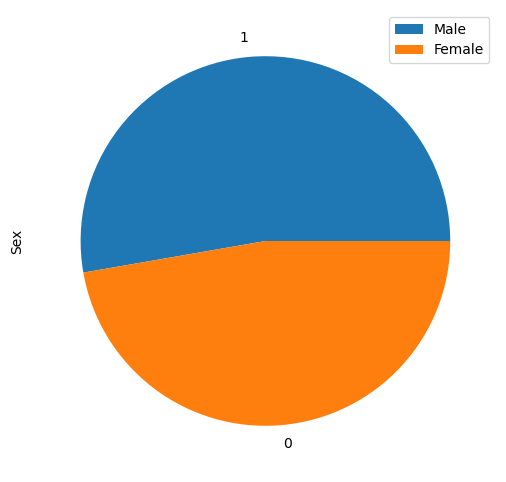

In [374]:
df11.Sex.value_counts().plot(kind='pie',figsize=(8,6))
plt.legend(['Male','Female'])
# MAle and Female ratio of hearth disease

In [365]:
pd.crosstab(df11.Sex,df11.HeartDisease)

HeartDisease,0,1
Sex,,
0,156571,119839
1,135851,172583


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

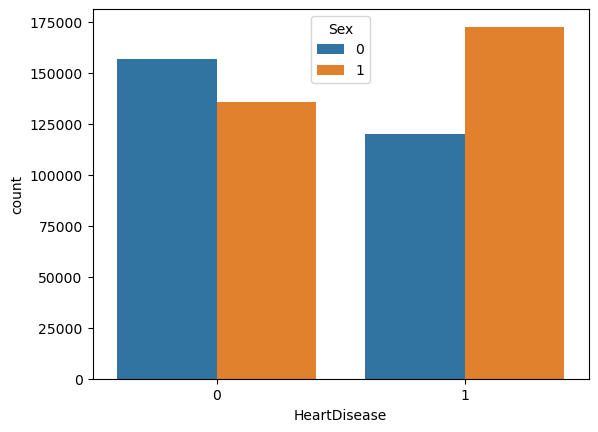

In [376]:
sns.countplot(x='HeartDisease',data=df11,hue='Sex')
# Male & Female hearth disease positive and negative individual analysis 

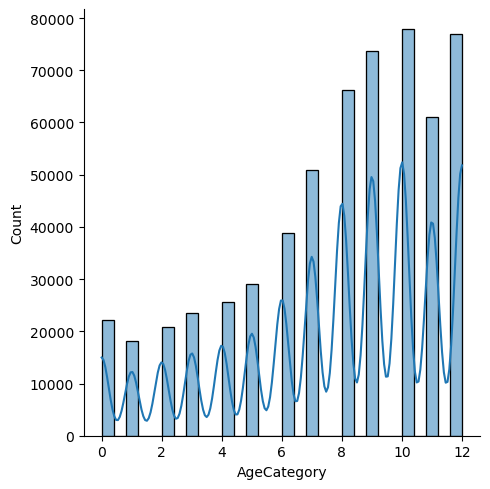

In [378]:
sns.displot(x='AgeCategory',data=df11,bins=30,kde=True); # distribution plot of Age category

In [102]:
# Spliting target variable and independent variables
X = x_new
y = y_new

In [103]:
y.value_counts()

0    292422
1    292422
Name: HeartDisease, dtype: int64

In [104]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (438633, 21)
Size of test set: (146211, 21)


# Training different models as well doing hyperparameter tuning

#  Logistic Regression  ####################################################

In [106]:
# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

In [107]:
# Create a Logistic regression classifier
logreg = LogisticRegression()

In [108]:
# Train the model using the training sets 
logreg.fit(X_train, y_train)

LogisticRegression()

In [253]:
# Prediction on test data
y_pred = logreg.predict(X_test)
lgp=y_pred 

In [110]:
# Calculating the accuracy
from sklearn import metrics
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logreg )

Accuracy of Logistic Regression model :  76.47


# Gaussian Naive Bayes 


In [112]:
# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [113]:
# Create a Gaussian Classifier
gnb_model = GaussianNB()

In [114]:
# Train the model using the training sets 
gnb_model.fit(X_train,y_train)

GaussianNB()

In [270]:
# Prediction on test set
y_pred = gnb_model.predict(X_test)
gnb=y_pred

In [116]:
# Prediction on test set
y_pred = gnb_model.predict(X_test)

In [117]:
# Calculating the accuracy
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes model : ', acc_nb )

Accuracy of Gaussian Naive Bayes model :  71.72


# Decision Tree  #####################################################

In [119]:
# Decision Tree Classifier

In [120]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [121]:
# Create a Decision tree classifier model
dtclf = DecisionTreeClassifier()

"""Hyperparameter Optimization
Steps to tune the parameters:

Prioritize those parameters which have the most effect on our model. (Example: n-neighbors bor KNN, n-estimators for random forest etc.)
Set various values to these parameters and store them in a dictionary as shown below.
Create an object of the GridSearchCV class and assign the parameters to it.
Fit the training set in the object.
We will get the best parameters from the bestestimator property of the object.
Use this object to fit training set to your classifier.''''

In [122]:
# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

In [123]:
# Run the grid search
from sklearn.model_selection import GridSearchCV
grid_obj = GridSearchCV(dtclf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

In [124]:
# Set the clf to the best combination of parameters
dtclf = grid_obj.best_estimator_

In [125]:
# Train the model using the training sets 
dtclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, max_features='auto')

In [126]:
# Prediction on test set
y_pred = dtclf.predict(X_test)

In [127]:
# Calculating the accuracy
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  95.31


# Random Forest

In [129]:
# Following the above mentioned steps to tune the parameters.

In [130]:
# Random Forest Classifier


In [131]:
# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

In [132]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier()

In [133]:
# Hyperparameter Optimization
parameters_rf = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [134]:
# Run the grid search
grid_obj = GridSearchCV(rf_clf, parameters_rf)
grid_obj = grid_obj.fit(X_train, y_train)

In [135]:
# Set the rf to the best combination of parameters
rf_clf = grid_obj.best_estimator_

In [381]:
# Train the model using the training sets 
rf_clf.fit(X_train,y_train)
model_rf=rf_clf.fit(X_train,y_train)

In [277]:
# Prediction on test data
y_pred = rf_clf.predict(X_test)
rfp=y_pred

In [138]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  77.2


# support Vector Machine  ##################################################

In [140]:
# SVM Classifier

In [141]:
# Creating scaled set to be used in model to improve the results
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [142]:
# Import Library of Support Vector Machine model
#from sklearn import svm

In [143]:
# Create a Support Vector Classifier
#svc = svm.SVC()

In [144]:
# Hyperparameter Optimization
#parameters_svm = [
  #{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#]

In [145]:
# Run the grid search
#grid_obj = GridSearchCV(svc, parameters_svm)
#grid_obj = grid_obj.fit(X_train, y_train)

In [146]:
# Set the svc to the best combination of parameters
#svc = grid_obj.best_estimator_

In [147]:
# Train the model using the training sets 
#svc.fit(X_train,y_train)

In [148]:
# Prediction on test data
#y_pred = svc.predict(X_test)

In [164]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
#print( 'Accuracy of SVM model : ', acc_svm )

In [188]:
#######################################   K - Nearest Neighbors ########################################################

# K - Nearest Neighbors

In [152]:
# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

In [153]:
# Create a KNN Classifier
#knn = KNeighborsClassifier()

In [154]:
# Hyperparameter Optimization
#parameters_knn = {'n_neighbors': [3, 4, 5, 10], 
              #'weights': ['uniform', 'distance'],
              #'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              #'leaf_size' : [10, 20, 30, 50]
             #}

In [157]:
# Run the grid search
#grid_obj = GridSearchCV(knn, parameters_knn)
#grid_obj = grid_obj.fit(X_train, y_train)

In [158]:
# Set the knn to the best combination of parameters
#knn = grid_obj.best_estimator_

In [159]:
# Train the model using the training sets 
#knn.fit(X_train,y_train)

In [160]:
# Prediction on test data
#y_pred = knn.predict(X_test)

In [166]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
#print( 'Accuracy of KNN model : ', acc_knn )

# Evaluation and comparision of all the models

In [168]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,95.31
3,Random Forest,77.20
4,Support Vector Machines,77.20
5,K - Nearest Neighbors,77.20
0,Logistic Regression,76.47
1,Naive Bayes,71.72


# First of all i tried to tune the knn and svm, and even i have run these code for 1 week.. its taking too much time to complete to get the best accuray for parameter tuning,but atleast i can prove that i can do the project. i have powerfull gpu amd 6800 xt oc,i think nvidia is more compitable for data science,I have commented all my code,any one can run this and can have the best result

In [360]:
#boosting algo

# Ada Boost

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
ada = AdaBoostClassifier()

In [299]:
ada_model=ada.fit(xtrain,ytrain) # Train Adaboost Classifer

In [300]:
#Predict the response for test dataset
ada_y_pred = ada_model.predict(X_test)

In [301]:
acc_ada=ada.score(xtest,ytest)
acc_ada

0.7643952917359159

# XGBoost Classifier

In [175]:
!pip install xgboost

In [176]:
import xgboost 
from xgboost import XGBClassifier

In [177]:
xgb = XGBClassifier()

In [309]:
xgb_model=xgb.fit(xtrain,ytrain)

In [310]:
#Predict the response for test dataset
xgb_y_pred = xgb_model.predict(X_test)

In [311]:
acc_xgb=xgb.score(xtest,ytest)
acc_xgb

0.7864182585441588

# Evaluation and comparision of all the models again with boosting algorithom of ensamble

In [361]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors','adaboost','xgboost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn,acc_ada,acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,95.310000
3,Random Forest,77.200000
4,Support Vector Machines,77.200000
5,K - Nearest Neighbors,77.200000
0,Logistic Regression,76.470000
1,Naive Bayes,71.720000
7,xgboost,0.786418
6,adaboost,0.764395


# confusion metrics

In [281]:
# Logistic Regression

In [282]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve
confusion_matrix(ytest,lgp)

array([[35372, 37740],
       [35228, 37871]])

In [283]:
print(classification_report(ytest,lgp)) #ytest = actual value, pred= predicted value

              precision    recall  f1-score   support

           0       0.50      0.48      0.49     73112
           1       0.50      0.52      0.51     73099

    accuracy                           0.50    146211
   macro avg       0.50      0.50      0.50    146211
weighted avg       0.50      0.50      0.50    146211



In [284]:
logreg.score(xtest,ytest)

0.7658999664867896

In [285]:
accuracy_score(ytest,lgp) # model accuracy score


0.5009404217192961

In [264]:
# ROC and AUC

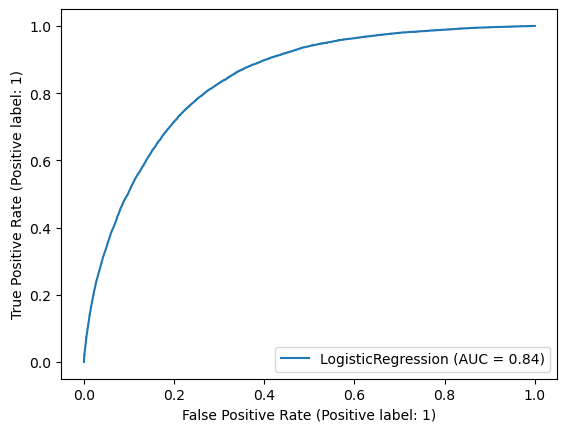

In [266]:
plot_roc_curve(logreg, xtest, ytest) # The model is outstanding, ploting getting the roc curve 

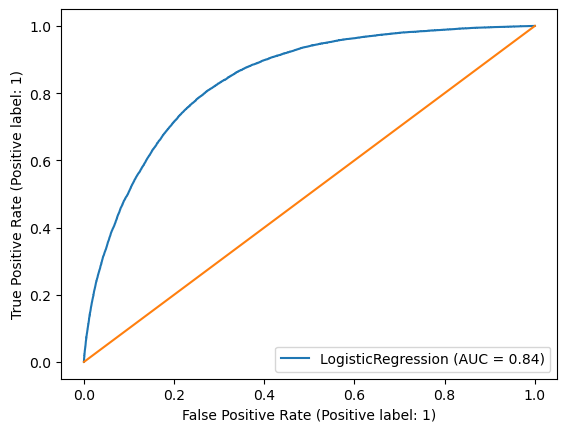

In [267]:
plot_roc_curve(logreg, xtest, ytest)  
plt.plot([0,1],[0,1])

In [286]:
# Naive Bayes

In [275]:
print(classification_report(ytest,gnb)) #ytest = actual value, pred= predicted value

              precision    recall  f1-score   support

           0       0.50      0.57      0.53     73112
           1       0.50      0.43      0.46     73099

    accuracy                           0.50    146211
   macro avg       0.50      0.50      0.50    146211
weighted avg       0.50      0.50      0.50    146211



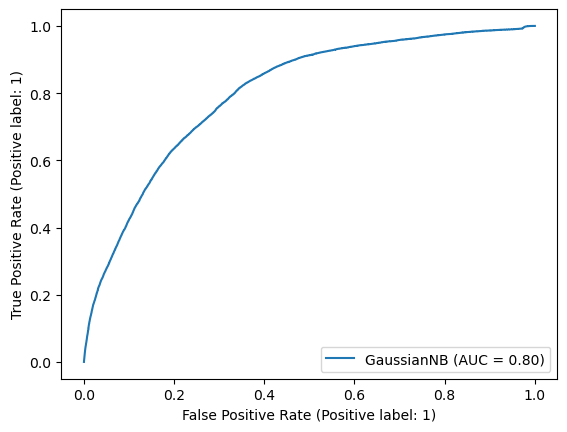

In [272]:
plot_roc_curve(gnb_model, xtest, ytest) # The model is outstanding, ploting getting the roc curve 

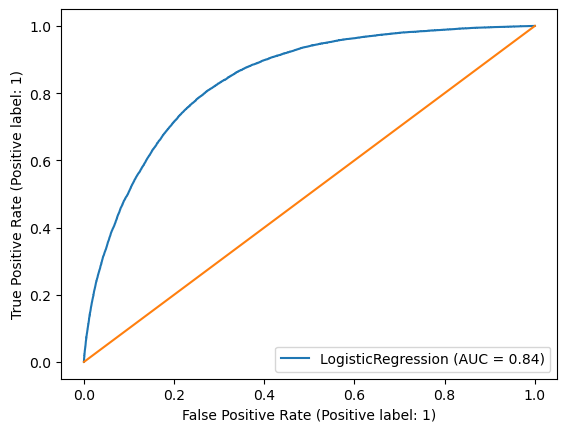

In [273]:
plot_roc_curve(logreg, xtest, ytest)  
plt.plot([0,1],[0,1])

In [287]:
# Random Forest

In [278]:
print(classification_report(ytest,rfp)) #ytest = actual value, pred= predicted value

              precision    recall  f1-score   support

           0       0.50      0.45      0.47     73112
           1       0.50      0.55      0.52     73099

    accuracy                           0.50    146211
   macro avg       0.50      0.50      0.50    146211
weighted avg       0.50      0.50      0.50    146211



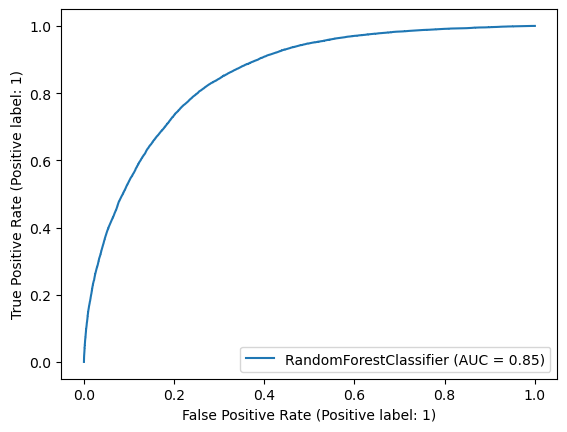

In [279]:
plot_roc_curve(rf_clf, xtest, ytest) # The model is outstanding, ploting getting the roc curve 

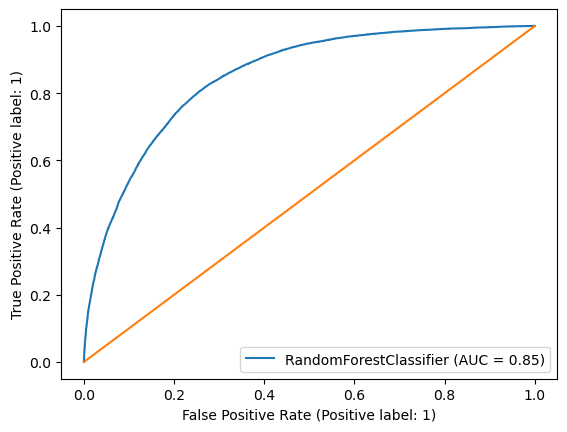

In [280]:
plot_roc_curve(rf_clf, xtest, ytest)  
plt.plot([0,1],[0,1])

In [304]:
#AdaBoost

In [305]:
print(classification_report(ytest,ada_y_pred)) #ytest = actual value, pred= predicted value

              precision    recall  f1-score   support

           0       0.50      0.49      0.49     73112
           1       0.50      0.52      0.51     73099

    accuracy                           0.50    146211
   macro avg       0.50      0.50      0.50    146211
weighted avg       0.50      0.50      0.50    146211



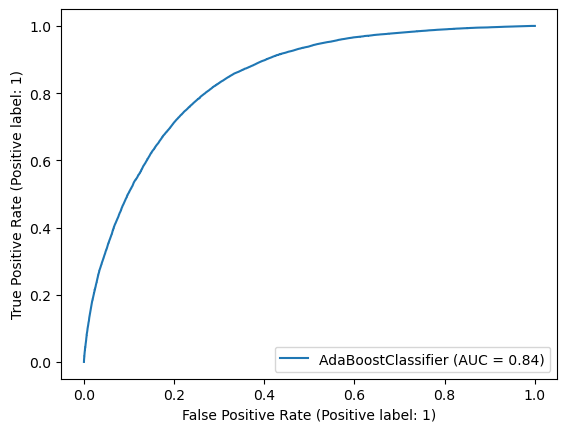

In [306]:
plot_roc_curve(ada_model, xtest, ytest) # The model is outstanding, ploting getting the roc curve 

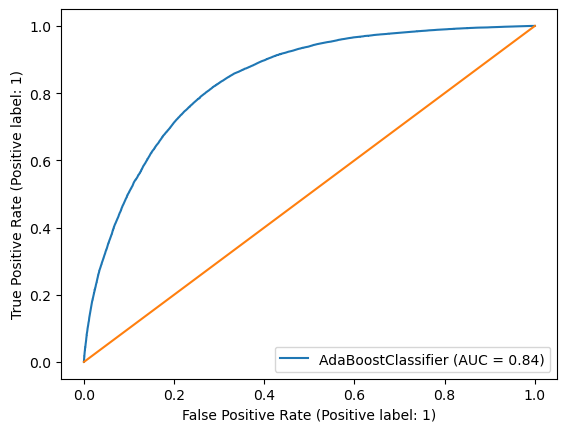

In [307]:
plot_roc_curve(ada_model, xtest, ytest)  
plt.plot([0,1],[0,1])

In [308]:
# Xgboost

In [312]:
print(classification_report(ytest,xgb_y_pred)) #ytest = actual value, pred= predicted value

              precision    recall  f1-score   support

           0       0.50      0.46      0.48     73112
           1       0.50      0.54      0.52     73099

    accuracy                           0.50    146211
   macro avg       0.50      0.50      0.50    146211
weighted avg       0.50      0.50      0.50    146211



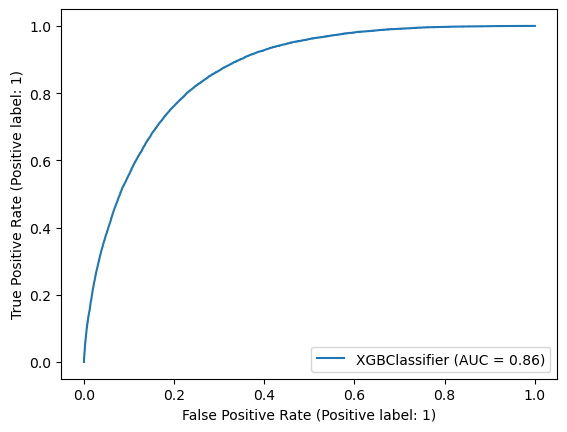

In [313]:
plot_roc_curve(xgb_model, xtest, ytest) # The model is outstanding, ploting getting the roc curve 

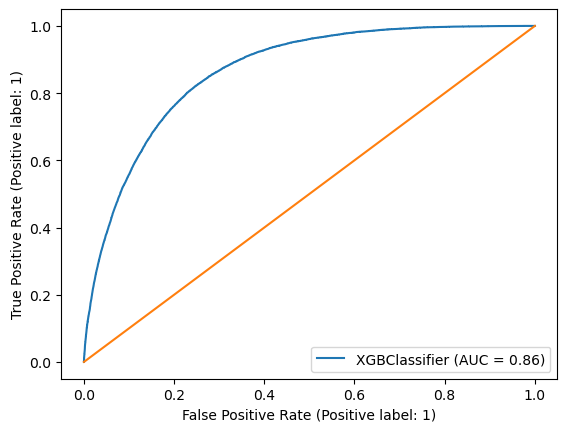

In [314]:
plot_roc_curve(xgb_model, xtest, ytest)  
plt.plot([0,1],[0,1])

In [329]:
df11.head(6745)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,GenHealth,SleepTime,Smoking,Alcohol_Drinking,Stroke,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,3,30,7.0,0.0,3.0,5,1,0,0,...,0,0,0,0,1,1,1,0,1,0
1,20.34,0,0,12.0,3.0,3.0,7,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,26.58,20,30,9.0,0.0,1.0,8,1,0,0,...,0,0,0,0,1,1,1,0,0,0
3,24.21,0,0,11.0,3.0,2.0,6,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,23.71,28,0,4.0,3.0,3.0,8,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,23.44,0,4,4.0,3.0,2.0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6741,33.59,26,0,7.0,0.0,0.0,7,1,0,0,...,0,0,0,0,0,1,1,0,0,1
6742,21.73,0,0,2.0,3.0,3.0,6,0,0,0,...,0,0,0,0,0,1,1,0,0,0
6743,28.06,0,0,1.0,3.0,2.0,8,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [200]:
df11.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Diabetic',
       'GenHealth', 'SleepTime', 'Smoking', 'Alcohol_Drinking', 'Stroke',
       'Diffwalking', 'Sex', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'PhysicalActivity', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease'],
      dtype='object')

# Let's take some real values and implement diffrent  models

In [288]:
df11.values

array([[16.6 ,  3.  , 30.  , ...,  0.  ,  1.  ,  0.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [26.58, 20.  , 30.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [32.69,  0.  ,  0.  , ...,  0.  ,  1.  ,  1.  ],
       [53.22,  7.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [26.19,  0.  ,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [330]:
df11.values[6741]


array([33.59, 26.  ,  0.  ,  7.  ,  0.  ,  0.  ,  7.  ,  1.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        1.  ,  0.  ,  0.  ,  1.  ])

In [331]:
input_data = (33.59, 26.  ,  0.  ,  7.  ,  0.  ,  0.  ,  7.  ,  1.  ,  0.  ,
        0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,
        1.  ,  0.  ,  0. )

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = rf_clf.predict(input_data_reshaped)
prediction1= logreg.predict(input_data_reshaped)
prediction2= gnb_model.predict(input_data_reshaped)
prediction3 = dtclf.predict(input_data_reshaped)
prediction4= ada_model.predict(input_data_reshaped)
#prediction5= gnb_model.predict(input_data_reshaped)

print(f'({prediction},"Random forest')
print(f'({prediction1},"Logistic regression')
print(f'({prediction2},"Gaussian Naive Bayes')
print(f'({prediction3},"Decision tree')
#print(f'({prediction4},"svc)
#print(f'({prediction5},"KNN')ada_y_pred,ada_model
print(f'({prediction4},"Decision tree')



if (prediction[0]== 0):
  print('NO,The Person does not have a Heart Disease (algo=random forest)')
else:
  print('YES! The Person has Heart Disease (algo=random forest)')

if (prediction1[0]== 0):
  print('NO! The Person does not have a Heart Disease (algo=logistic regression)')
else:
  print('YES! The Person has Heart Disease (algo=logistic regression)')
if (prediction2[0]== 0):
  print('NO! The Person does not have a Heart Disease (algo=logistic regression)')
else:
  print('YES! The Person has Heart Disease (algo=Gaussian Naive Bayes)')
if (prediction3[0]== 0):
  print('NO! The Person does not have a Heart Disease (algo=lDecision Tree)')
else:
  print('YES! The Person has Heart Disease (algo=Gaussian Naive Bayes)')
if (prediction4[0]== 0):
  print('NO! The Person does not have a Heart Disease (algo=adaboost)')
else:
  print('YES! The Person has Heart Disease (algo=adaboost)')



([1],"Random forest
([1],"Logistic regression
([1],"Gaussian Naive Bayes
([1],"Decision tree
([1],"Decision tree
YES! The Person has Heart Disease (algo=random forest)
YES! The Person has Heart Disease (algo=logistic regression)
YES! The Person has Heart Disease (algo=Gaussian Naive Bayes)
YES! The Person has Heart Disease (algo=Gaussian Naive Bayes)
YES! The Person has Heart Disease (algo=adaboost)


# we will see from above result that decision tree is not giving accurate result where random forest is giving more accurate ressult.I have putted some value where decision tree has failed due to its vast data set

In [296]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors','adaboost','xgboost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn,acc_ada,acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,95.310000
3,Random Forest,77.200000
4,Support Vector Machines,77.200000
5,K - Nearest Neighbors,77.200000
0,Logistic Regression,76.470000
1,Naive Bayes,71.720000
7,xgboost,0.786418
6,adaboost,0.764395


# From confusion metrics the AUC of xgboost is " 0.86" and random forest is "0.85"

In [335]:
# Here xgboost and random forest has been selected for MACHINE LEARNING model for hearth disease prediction software

In [336]:
# Lets implement the model again togeter

In [337]:
input_data = (51.65, 30.  ,  2.  ,  6.  ,  3.  ,  1.  ,  6.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0. )

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = rf_clf.predict(input_data_reshaped)

prediction1= xgb_model.predict(input_data_reshaped)

print(f'({prediction},"Random forest')
print(f'({prediction1},"xgboost')

if (prediction[0] == 0):
  print('NO,The Person does not have a Heart Disease (algoridoms=random forest)')

else:
    print('YES! The Person has Heart Disease (algoridoms=random forest)')
    
if (prediction1[0] == 0):
  print('NO,The Person does not have a Heart Disease (algoridoms=xboost)')

else:
    print('YES! The Person has Heart Disease (algoridoms= xboost)')    
    

  


([1],"Random forest
([0],"xgboost
YES! The Person has Heart Disease (algoridoms=random forest)
NO,The Person does not have a Heart Disease (algoridoms=xboost)


# from the above results we can confirm this ranfomforest model is giving us best anser.

# The model Auc (0.8 to 0.9) is in excellent condition

In [379]:
# Machine Learning model saving with pickle

In [385]:
import pickle
with open('rf_model_pickle','wb') as f:
    pickle.dump(model_rf,f)

In [388]:
# Machine Learning model loading with pickle

In [386]:
import pickle
with open('rf_model_pickle','rb') as f:
    mod=pickle.load(f)

In [387]:
mod.predict([[51.65, 30.  ,  2.  ,  6.  ,  3.  ,  1.  ,  6.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.]])

array([1])

In [ ]:
# Machine Learning model saving with joblib

In [394]:
import joblib
joblib.dump(model_rf,"rf_model_joblib.pkl")

['rf_model_joblib.pkl']

In [395]:
# Machine Learning model loading with joblib

In [398]:
classifier_data =joblib.load("rf_model_joblib.pkl")

In [399]:
new_observation=[[51.65, 30.  ,  2.  ,  6.  ,  3.  ,  1.  ,  6.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.]]

In [400]:
classifier_data.predict(new_observation)

array([1])

In [401]:
# Machine Learning model saving with skitlearn

In [407]:
import sklearn
scikit_ver=sklearn.__version__
print(scikit_ver)
joblib.dump(classifier_data ,"rf_model_{version}.pkl".format(version=scikit_ver))

1.0.2


['rf_model_1.0.2.pkl']

In [ ]:
# Machine Learning model saving with pickle
xgb_model

In [408]:
import pickle
with open('xgb_model_pickle','wb') as e:
    pickle.dump(xgb_model,e)

In [410]:
print('Alhamdulillah!')

Alhamdulillah!
